In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Task 1:
#This assignment is for visualization using matplotlib:
#data to use:
#url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
#titanic = pd.read_csv(url)
#Charts to plot:
#1. Create a pie chart presenting the male/female proportion
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [4]:
# Reading data in myData from the csv file
myData = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [ ]:
#1. Create a pie chart presenting the male/female proportion

Text(0,0.5,'male')

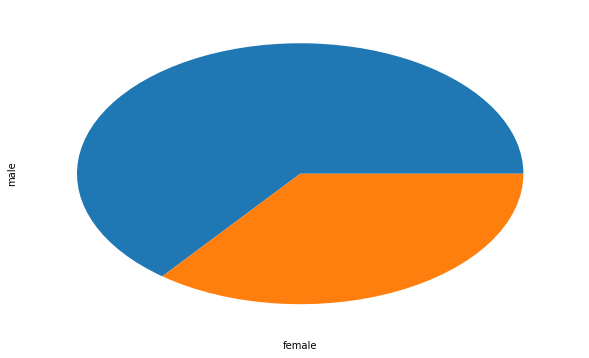

In [8]:
# Creating a Pie chart to present male/female proportion from the dataset read
myPieChart = plt.figure(figsize=(10,6))
plt.pie(myData.sex.value_counts())
plt.xlabel('female')
plt.ylabel('male')

In [9]:
myData.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [11]:
#checking if there is null in Gender, Fare and Age columns
myData.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [13]:
# takign care of the null values and filling them with the previous values in respective columns
myData.sex.fillna(method='ffill',inplace=True)
myData.fare.fillna(method='ffill',inplace=True)
myData.age.fillna(method='ffill',inplace=True)

#Verifying if nulls have been taken care of in these 3 respective columns
myData.isnull().sum()

pclass          1
survived        1
name            1
sex             0
age             0
sibsp           1
parch           1
ticket          1
fare            0
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

Text(0,0.5,'Fare')

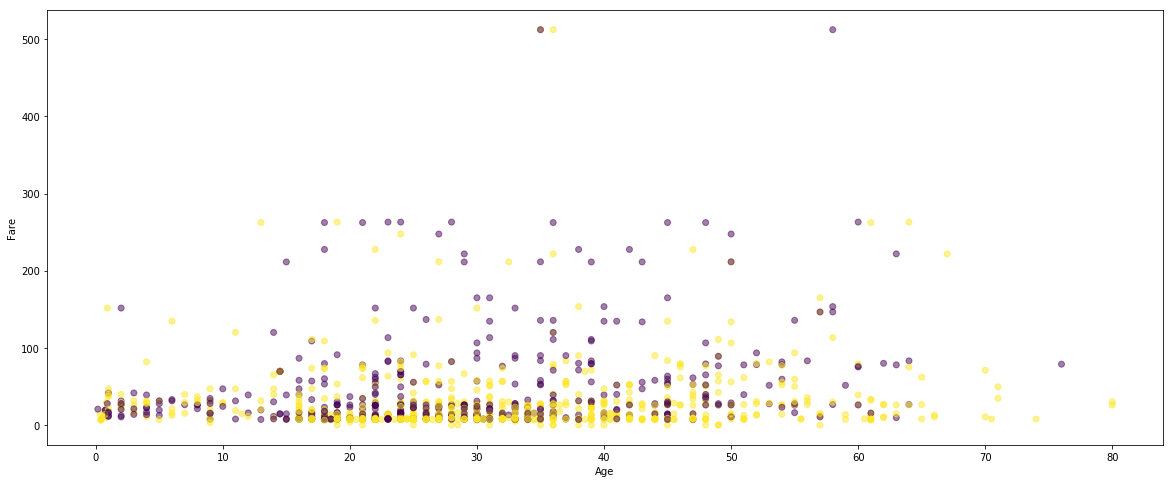

In [14]:
#starting the process to draw the Graph
myFig = plt.figure(figsize=(20,8))
plt.scatter(myData['age'], myData['fare'], alpha=0.5, c=pd.factorize(myData['sex'])[0])
plt.xlabel('Age')
plt.ylabel('Fare')

In [ ]:
#Task 2:
#It happens all the time: someone gives you data containing malformed strings, Python, lists and
#missing data. How do you tidy it up so you can get on with the analysis?
#Take this monstrosity as the DataFrame to use in the following puzzles:
#df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
#'Budapest_PaRis', 'Brussels_londOn'],
#'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
#'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
#'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [16]:
#defining the frame as expected in the task itself
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [17]:
#printing the dataframe created
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045.0,LoNDon_paris,"[23, 47]"
1,<Air France> (12),NaN,MAdrid_miLAN,[]
2,(British Airways. ),10065.0,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,NaN,Budapest_PaRis,[13]
4,"""Swiss Air""",10085.0,Brussels_londOn,"[67, 32]"


In [ ]:
#1. Some values in the the FlightNumber column are missing. These numbers are meant to
#increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
#numbers and make the column an integer column (instead of a float column).

In [18]:
#Fillin in the missing values in Flight number
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df.FlightNumber

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int32

In [ ]:
#2. The From_To column would be better as two separate columns! Split each string on the
#underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
#correct column names to this temporary DataFrame.

In [20]:
#Taking care to replace the '_' with ' '
df['From_To'] = df.From_To.str.replace("_"," ")
#checking the dataframe with updated repalced value
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045,LoNDon paris,"[23, 47]"
1,<Air France> (12),10055,MAdrid miLAN,[]
2,(British Airways. ),10065,londON StockhOlm,"[24, 43, 87]"
3,12. Air France,10075,Budapest PaRis,[13]
4,"""Swiss Air""",10085,Brussels londOn,"[67, 32]"


In [ ]:
#3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
#Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
#"London".)

In [21]:
df.From_To.str.capitalize()

0        London paris
1        Madrid milan
2    London stockholm
3      Budapest paris
4     Brussels london
Name: From_To, dtype: object

In [ ]:
#4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [28]:
#attaching the temporary DataFrame from the previous scenario
df['From_To'] = df.From_To.str.capitalize()
#printing the updated df below
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045,London paris,"[23, 47]"
1,<Air France> (12),10055,Madrid milan,[]
2,(British Airways. ),10065,London stockholm,"[24, 43, 87]"
3,12. Air France,10075,Budapest paris,[13]
4,"""Swiss Air""",10085,Brussels london,"[67, 32]"


In [ ]:
#5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
#would like each first value in its own column, each second value in its own column, and so on. If
#there isn't an Nth value, the value should be NaN.
#Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
#delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [29]:
df.assign(**pd.DataFrame(df['RecentDelays'].tolist()).add_prefix('Recent_'))

,Airline,FlightNumber,From_To,RecentDelays,Recent_0,Recent_1,Recent_2
0,KLM(!),10045,London paris,"[23, 47]",23.0,47.0,NaN
1,<Air France> (12),10055,Madrid milan,[],NaN,NaN,NaN
2,(British Airways. ),10065,London stockholm,"[24, 43, 87]",24.0,43.0,87.0
3,12. Air France,10075,Budapest paris,[13],13.0,NaN,NaN
4,"""Swiss Air""",10085,Brussels london,"[67, 32]",67.0,32.0,NaN
